# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
units = "metric"
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_json = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['sys']['sunrise']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | tashtagol
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | kensington
Processing Record 14 of Set 1 | potosi
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | los llanos de aridane
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | san cristobal
Processing Record 20 of Set 1 | cayenne
Processing Record 21 of Set 1 | tsihombe
City not f

In [6]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          525
Lat           525
Lng           525
Max Temp      525
Humidity      525
Cloudiness    525
Wind Speed    525
Country       525
Date          525
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,24.41,78,100,4.90,PF,1671286176
1,tashtagol,52.7657,87.8894,-16.73,97,7,1.03,RU,1671243337
2,bluff,-46.6000,168.3333,11.66,84,100,4.89,NZ,1671295696
3,yellowknife,62.4560,-114.3525,-25.71,76,40,3.60,CA,1671296637
4,busselton,-33.6500,115.3333,19.00,61,6,7.83,AU,1671311017


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,24.41,78,100,4.90,PF,1671286176
1,tashtagol,52.7657,87.8894,-16.73,97,7,1.03,RU,1671243337
2,bluff,-46.6000,168.3333,11.66,84,100,4.89,NZ,1671295696
3,yellowknife,62.4560,-114.3525,-25.71,76,40,3.60,CA,1671296637
4,busselton,-33.6500,115.3333,19.00,61,6,7.83,AU,1671311017


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

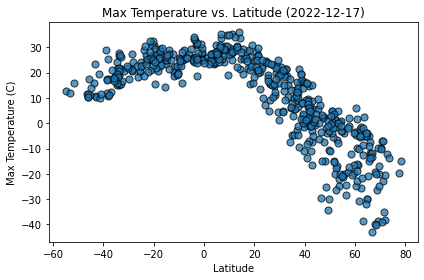

In [10]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
date = city_data_df.loc[0,"Date"]

# Using .fromtimestamp() function to convert epoch time into datetime object (found online)
mytimestamp = datetime.fromtimestamp(date)
  
# Using strftime() function to convert (found online)
datetime_str = mytimestamp.strftime( "%Y-%m-%d")  

# Create Temp vs. Latitude scatter plot
plt.scatter(x=latitude, y=temperature, s=50, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"Max Temperature vs. Latitude ({datetime_str})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

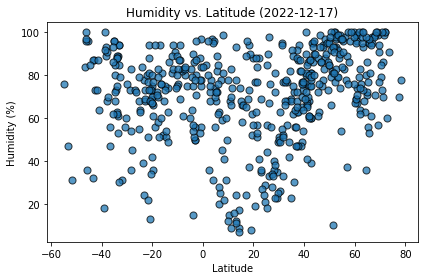

In [11]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(x=latitude, y=humidity, s=50, edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title(f"Humidity vs. Latitude ({datetime_str})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

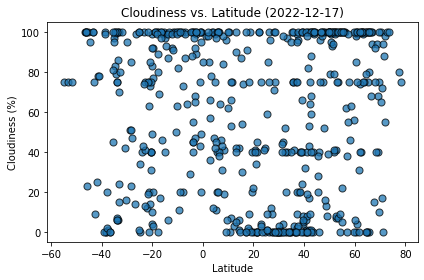

In [12]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(x=latitude, y=cloudiness, s=50, edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title(f"Cloudiness vs. Latitude ({datetime_str})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed

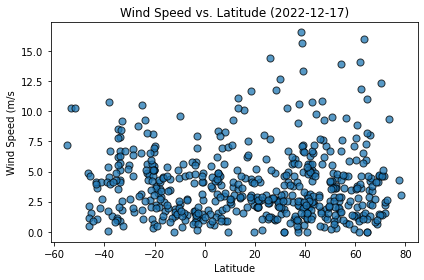

In [13]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(x=latitude, y=wind_speed, s=50, edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title(f"Wind Speed vs. Latitude ({datetime_str})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

def linear_regression_plot(x_values, y_values, annotate_location, xlabel, ylabel):

    # Unpack linregress tuple of x and y values to store slope, y-intercept, rvalue, pvalue, and stderr
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Define the line equation as a string in slope-intercept form
    line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"

    # Calculate y-values of regression line from the x_values parameter, slope and y-intercept
    regress_values = slope * x_values + intercept

    # Print the r-value (correlation coefficient)
    print(f"The r-value is: {rvalue}")

    # Set up scatter plot of x_values vs y_values including regression line and line equation
    plt.scatter(x_values, y_values, s=50, edgecolors="black", alpha=0.75)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x_values,regress_values,"red")
    plt.annotate(line_eq, xy=annotate_location,fontsize=15,color="red")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tashtagol,52.7657,87.8894,-16.73,97,7,1.03,RU,1671243337
3,yellowknife,62.4560,-114.3525,-25.71,76,40,3.60,CA,1671296637
5,kapaa,22.0752,-159.3190,20.18,88,100,4.12,US,1671296998
14,los llanos de aridane,28.6585,-17.9182,19.86,81,75,2.68,ES,1671263888
16,san cristobal,7.7669,-72.2250,24.10,45,31,3.01,VE,1671274495


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,24.41,78,100,4.90,PF,1671286176
2,bluff,-46.6000,168.3333,11.66,84,100,4.89,NZ,1671295696
4,busselton,-33.6500,115.3333,19.00,61,6,7.83,AU,1671311017
6,port alfred,-33.5906,26.8910,21.77,89,100,0.89,ZA,1671245837
7,mataura,-46.1927,168.8643,10.40,100,100,0.50,NZ,1671295672


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8743992162202139


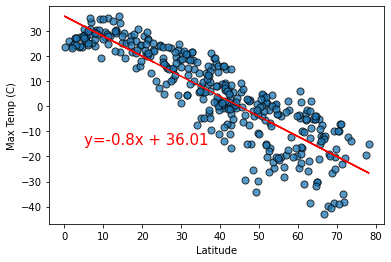

In [17]:
# Linear regression on Northern Hemisphere
northern_temp = northern_hemi_df["Max Temp"]
northern_lat = northern_hemi_df["Lat"]

# Use linear_regression_plot function to create linear regression plot
linear_regression_plot(northern_lat, northern_temp, (5,-15), "Latitude", "Max Temp (C)")

The r-value is: 0.6735462967362309


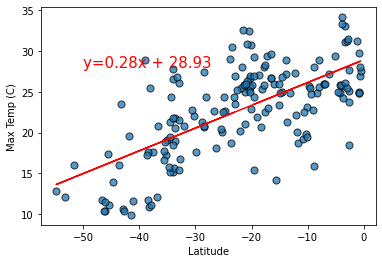

In [18]:
# Linear regression on Southern Hemisphere
southern_temp = southern_hemi_df["Max Temp"]
southern_lat = southern_hemi_df["Lat"]

# Use linear_regression_plot function to create linear regression plot
linear_regression_plot(southern_lat, southern_temp, (-50,28), "Latitude", "Max Temp (C)")

**Discussion about the linear relationship:** 

Each of the above scatter plots and displays the linear regression line for Max Temp vs. Latitude in the Northern and Southern hemispheres, respectively.

The Northern hemisphere plot shows a strong negative correlation between a location's daily maximum temperature and latitude (r-value of about -0.87), indicating that as one moves north away from the equator, the daily maximum temperature tends to decrease. 

The Southern hemisphere plot shows a somewhat similar strength of correlation (r-value of about 0.67) -  weaker than in the Northern hemisphere but still a moderate to strong positive correlation. This difference may be due to the fact that the number of data points for the southern hemisphere is half the amount of those in the northern hemisphere, allowing for a slightly greater margin of error. This indicates that as one approaches the equator from the south pole, the daily maximum temperature tends to increase.

Both scatter plots demonstrate the fact that the further a location is from the equator, the colder that location tends to be. Distance from the equator is a strong predictor of daily maximum temperature. It's possible that that as more data points are taken into account (i.e. larger sample size), we will see a stronger and more consistent correlation between these measurements.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.43538256112812806


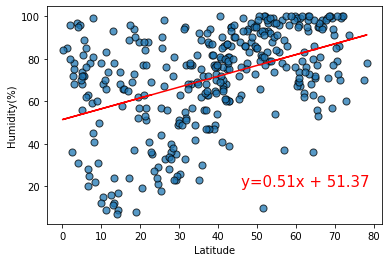

In [19]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_hum = northern_hemi_df["Humidity"]

# Use linear_regression_plot function to create linear regression plot
linear_regression_plot(northern_lat, northern_hum, (46,20), "Latitude", "Humidity(%)")

The r-value is: 0.004906305091311506


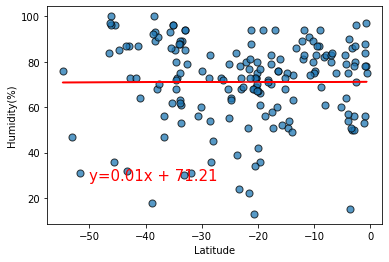

In [20]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_hum = southern_hemi_df["Humidity"]

# Use linear_regression_plot function to create linear regression plot
linear_regression_plot(southern_lat, southern_hum, (-50,28), "Latitude", "Humidity(%)")

**Discussion about the linear relationship:**

Each of the above scatter plots and displays the linear regression line for Humidity (%)) vs. Latitude in the Northern and Southern hemispheres, respectively.

The Northern hemisphere plot shows a weak correlation (r-value of about 0.44) between a location's humidity and latitude, indicating that as one moves north from the equator, there may be some increases in humidity on average.

The Southern hemisphere plot shows no correlation (r-value of about 0.005). This indicates that as one approaches the equator from the south, there is no significant change in humidity level overall.

Both scatter plots demonstrate that there is little to no correlation between the humidity of a location and its distance from the equator. The difference between these two r values may be explained by the fact that the number of data points in the southern hemisphere is half of the amount than in the northern hemisphere. While a location's distance from the equator may have some subtle impact on it's humidity levels, there are likely other more significant confounding factors involved.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.20224569396621783


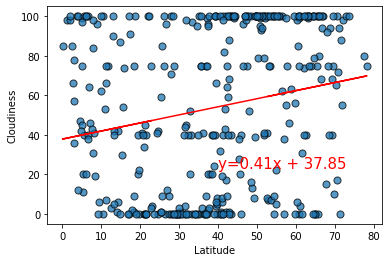

In [21]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_cloud = northern_hemi_df["Cloudiness"]

linear_regression_plot(northern_lat, northern_cloud, (40, 23), "Latitude", "Cloudiness")

The r-value is: 0.14897244468709125


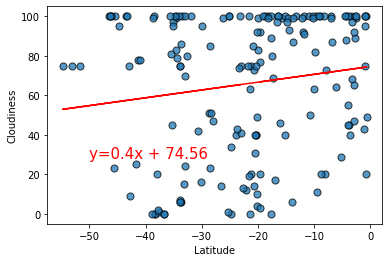

In [22]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_cloud = southern_hemi_df["Cloudiness"]

# Use linear_regression_plot function to create linear regression plot
linear_regression_plot(southern_lat, southern_cloud, (-50,28), "Latitude", "Cloudiness")

**Discussion about the linear relationship:** 

Each of the above scatter plots and displays the linear regression line for Cloudiness (%) vs. Latitude in the Northern and Southern hemispheres, respectively.

The Northern hemisphere plot shows a weak to no positive correlation (r-value of about 0.20), indicating that as one moves north away from the equator, there may be some increases in average overall cloudiness, if anything.

The Southern hemisphere plot shows a very weak positive correlation (r-value of about 0.15). This indicates that as one approaches the equator from the south pole, there be some subtle increases in average overall cloudiness.

Both scatter plots demonstrate that there is little correlation between the cloudiness of a location and its distance from the equator. A location's latitude should not be used to predict cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03074823188467051


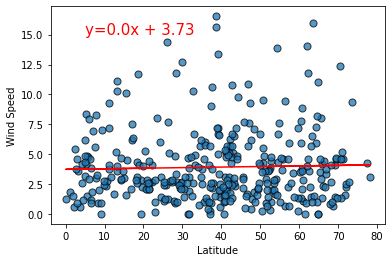

In [23]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_wind = northern_hemi_df["Wind Speed"]

linear_regression_plot(northern_lat, northern_wind, (5, 15), "Latitude", "Wind Speed")

The r-value is: -0.23587065065751725


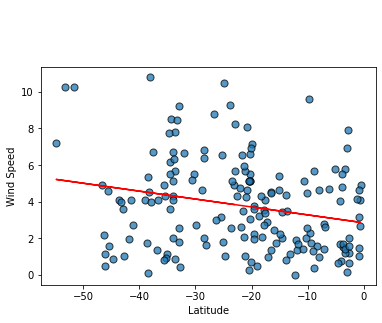

In [24]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_wind = southern_hemi_df["Wind Speed"]

linear_regression_plot(southern_lat, southern_wind, (-25,14), "Latitude", "Wind Speed")

**Discussion about the linear relationship:** 

Each of the above scatter plots and displays the linear regression line for Wind Speed vs. Latitude in the Northern and Southern hemispheres, respectively.

The Northern hemisphere plot shows a very weak positive correlation (r-value of about 0.03), indicating that as one moves north from the equator, wind speed is relatively unaffected.

The Southern hemisphere plot shows a very weak negative correlation (r-value of about -0.24). This indicates that as one approaches the equator from the south, there may be some subtle decreases in average overall wind speed.

Both scatter plots demonstrate that there is little to no correlation between the wind speed of a location and latitude. There are certainly other variables involved that have a greater impact on wind speed. If we were to use a larger sample size to examine this relationship in the southern hemisphere, I suspect we may see a decrease in the r-value.